# Dynamical reduction

In [1]:
import numpy as np

# Dimension
D = 200;
X = np.linspace(0,10,D);

# Initialization
def f(x,mu):
    return np.exp(-0.5*((x-(5+mu))**2)/mu**0.125)

# Time-dependent snapshots
V  = [];
N  = 10; # Number of TD-snapshots
K  = 500; # Number of time steps
mu = np.random.random([N,2])*0.4 + 0.8;

for i in range(N):
    # Dynamic operator
    updiag =  0.375 * mu[i,0];
    mddiag =  0.75  * mu[i,0];
    dndiag = -0.125 * mu[i,0];
    A = dndiag*np.eye(D,k=-1) + mddiag*np.eye(D) + updiag*np.eye(D,k=1);

    # Initial vector
    v1 = f(X,mu[i,1]);
    v1 = v1.reshape([D,1])

    # Trajectory
    v = v1;
    W = v1;

    for n in range(K):
        v = A@v;
        W = np.concatenate((W,v),axis=1)
    
    V.append(W)

Text(0, 0.5, 'v')

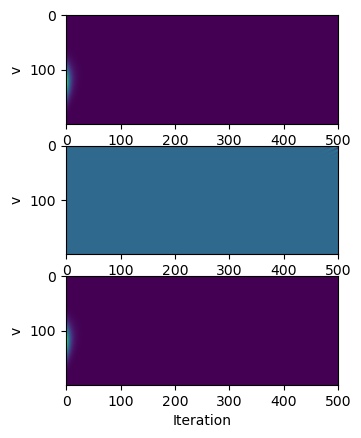

In [2]:
import pylab as pl
fig, ax = pl.subplots(3,1)

ax[0].imshow(V[0])
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('v')

ax[1].imshow(V[4])
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('v')

ax[2].imshow(V[2])
ax[2].set_xlabel('Iteration')
ax[2].set_ylabel('v')

In [3]:
ax

array([<AxesSubplot:xlabel='Iteration', ylabel='v'>,
       <AxesSubplot:xlabel='Iteration', ylabel='v'>,
       <AxesSubplot:xlabel='Iteration', ylabel='v'>], dtype=object)